Feature Extraction: transforms or projects dataset into a new feature subspace of lower dimensionality
- Principal Component Analysis (PCA): unsupervised data compression
- Linear Discriminant Analysis (LDA): supervised dimensionality reduction technique for maximizing class separability
- Kernel Principal Component Analysis: nonlinear dimensionality reduction

### Unsupervised Dimensionality Reduction via PCA

PCA:
- identify patterns in data based on correlation between features
- finds the directions of maximum variance in high-dimensional data and projects it into a new subspace with equal or fewer dimensions
- orthogonal axes are directions of maximum variance

PCA in Steps:
1. Standardize the d-dimensional
2. Construct the covariance matrix
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace(k<=d)
5. Construct a projection matrix W from the "top" k eigenvectors.
6. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

#### Total and Explained Variance

In [1]:
# Importing wine dataset

import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
                      , header=None)

In [2]:
# Splitting data into training and test

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
# Constructing covariance matrix and getting eigen pairs

import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print '\nEigenvalues \n%s' % eigen_vals


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


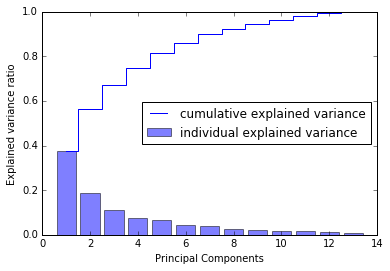

In [4]:
# Plotting the variance explained ratios

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

Random Forest uses class membership information to compute the node impurities, variance measures the spread of values along a feature axis

#### Feature Transformation

Sort eigen pairs by descending order of the eigenvalues.
Construct a projection matrix from the selected eigenvectors.
Use projection matrix to transform data into lower-dimensional subspace

In [5]:
# Sort eigenpairs by decreasing order

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print 'Matrix W:\n',w

Matrix W:
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [6]:
# Transforming a sample onto the PCA subspace

X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [7]:
# Transforming the entire wine dataset

X_train_pca = X_train_std.dot(w)

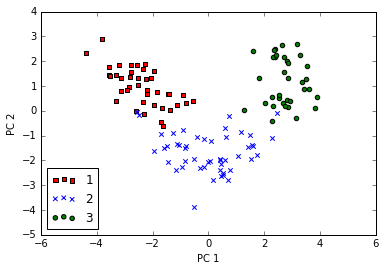

In [26]:
# Visualizing transformed Wine training set

colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0], X_train_pca[y_train==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

#### PCA in Scikit-Learn

In [12]:
# Function to plot PCA decision regions

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # Setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ['red','blue','lightgreen','gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plotting the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

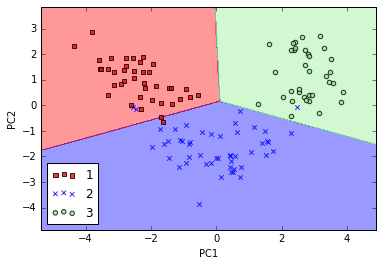

In [13]:
# Plotting decision regions for the training data

## Importing PCA and LR
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Creating PCA and LR objects
pca = PCA(n_components=2)
lr = LogisticRegression()

## Transforming training and test data using PCA
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## Fitting PCA transformation data into LR
lr.fit(X_train_pca, y_train)

## Plotting the results
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

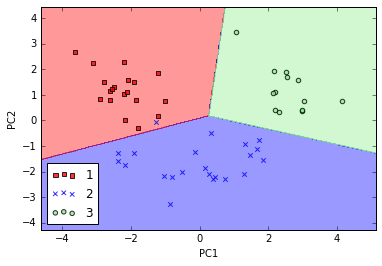

In [27]:
# Plotting decision regions for the test data

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [28]:
# Explained Variance Ratio

pca = PCA(n_components=None) # Used None to display all PCA before reduction
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.3733,  0.1882,  0.109 ,  0.0772,  0.0648,  0.0459,  0.0399,
        0.0252,  0.0226,  0.0183,  0.0164,  0.0128,  0.0064])

#### Supervised Data Compression via Linear Discriminent Analysis

LDA:
- supervised technique for feature extraction
    - increases computational efficiency
    - reduce degree of over-fitting due to curse of dimensionality in nonregularized models
- finds feature subspace that optimizes class separability
- Assumptions:
    - data is normally distributed
    - classes have identical covariance
    - features are statistically independent of each other
- Steps:
    1. Standardize the d-dimensional dataset (d: number of features)
    2. For each class, compute the d- dimensional mean vector
    3. Construct the between-class scatter matrix sb and the within class sw
    4. Compute eigenvectors and corresponding eigenvalues of the matrix sb, sw
    5. Choose the k eigenvectors that correspond to the k largerst eigenvalues to construct a d*k- dimensional transformation matrix W; eigenvectors are the columns of this matrix
    6. Project the samples onto the new feature subspace using the transformation matrix w.

In [29]:
# Constructing mean vectors 

np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print 'MV %s: %s\n' %(label, mean_vecs[label-1])

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [35]:
# Calculating with-in class matrix Sw (summing up individual scatter matrices of each class)

d = 13 # number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train[y_train == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print 'Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1])

Within-class scatter matrix: 13x13


In [37]:
# Checking to see the number of class labels

print 'Class Label distribution: %s' %np.bincount(y_train)[1:]

Class Label distribution: [40 49 35]


In [38]:
# Based on the number of class labels, we need to scale the data, which is the same as covariance matrix

d = 13 # number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print 'Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1])

Within-class scatter matrix: 13x13


In [39]:
# Calculating between-class scatter matrix

mean_overall = np.mean(X_train_std, axis=0)
d = 13 
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
S_B += n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print 'Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1])

Between-class scatter matrix: 13x13


#### Selecting Linear Discriminants for the New Feature Subspace

In [40]:
# Solving generalized eigenvalue problem of matrix (S-1w)(Sb)

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print 'Eigenvalues in decreasing order:\n'
for eigen_val in eigen_pairs:
    print eigen_val[0]

Eigenvalues in decreasing order:

269.799757873
2.81194438296e-14
2.14483178831e-14
1.68689335069e-14
1.68689335069e-14
1.40782997476e-14
1.20113839905e-14
1.20113839905e-14
4.40949335143e-15
4.40949335143e-15
1.95107674682e-15
2.16267478387e-17
0.0


The number of linear discriminants is at most c-1 where c is the number of class labels

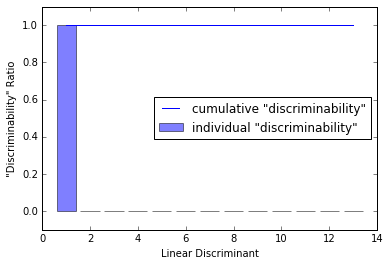

In [22]:
# Plotting how much the linear discriminants (eigenvectors) is captured

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1,14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"Discriminability" Ratio')
plt.xlabel('Linear Discriminant')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.show()

#### LDA via Scikit-Learn

In [41]:
# Creating LDA object and transforming data

from sklearn.lda import LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

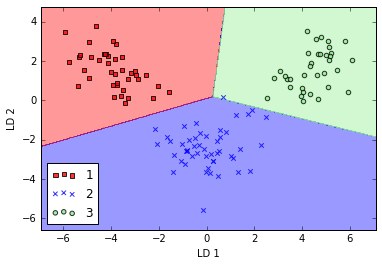

In [42]:
# Applying Logistic Regression after LDA transformation to training data

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

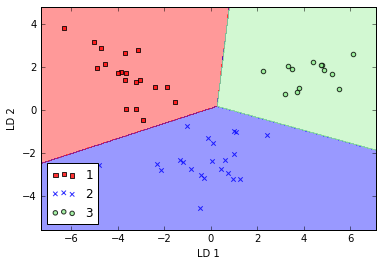

In [43]:
# Applying LR to LDA transformed data to test set

X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

### Using Kernel Principal Component Analysis for Nonlinear Mapping

Tackle non-linear problems by projecting them onto a feature space of higher dimensionality where the claeses become linearly separable.

### Implementing a kernel Principal Component Analysis in Python

In [ ]:
from scipy.spatial.distances import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(K, gamma, n_components):
    '''
    RBF Kernel PCA implementation.
    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    ---------
    X_pc: {NumPy ndarray}, shape = {n_samples, k_features} Projected dataset
    
    '''

    # Calculate pairwise squared Euclidean distances in the MxN dimensional dataset
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigenvecs[:,-i] for i in range(1, n_components+1)))
    
    return X_pc